# Importando as Bibliotecas Necessárias

In [1]:
import pickle
import numpy as  np

import pandas as pd
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Carregando os dados

In [2]:
# Reading the dataset

train = pd.read_csv('../Dataset/Train/train.csv')
test = pd.read_csv('../Dataset/Test/test.csv')

In [3]:
# Setting data

X_train = train.drop(columns=['class', 'sub_class'])
y_train = train['class']

X_test = test.drop(columns=['class', 'sub_class'])
y_test = test['class']

# Definindo e Treinando o Classificador

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(50, 100, 50),
                    random_state=42,
                    max_iter=1000,
                    learning_rate_init=0.001,
                    learning_rate='adaptive',
                    validation_fraction = 0.1,
                    batch_size = 32,
                    early_stopping = True,
                    verbose = True,               
                   )

In [5]:
# Treinando o classificar

clf.fit(X_train.values, y_train.values)

Iteration 1, loss = 0.49363135
Validation score: 0.755363
Iteration 2, loss = 0.46718454
Validation score: 0.759448
Iteration 3, loss = 0.46032928
Validation score: 0.773919
Iteration 4, loss = 0.45538878
Validation score: 0.769152
Iteration 5, loss = 0.45138491
Validation score: 0.775962
Iteration 6, loss = 0.44803364
Validation score: 0.773578
Iteration 7, loss = 0.44503696
Validation score: 0.780558
Iteration 8, loss = 0.44305375
Validation score: 0.782431
Iteration 9, loss = 0.43976354
Validation score: 0.784133
Iteration 10, loss = 0.43829102
Validation score: 0.786857
Iteration 11, loss = 0.43644670
Validation score: 0.773068
Iteration 12, loss = 0.43511193
Validation score: 0.785325
Iteration 13, loss = 0.43324892
Validation score: 0.785155
Iteration 14, loss = 0.43230574
Validation score: 0.787028
Iteration 15, loss = 0.43137027
Validation score: 0.788900
Iteration 16, loss = 0.43070814
Validation score: 0.789751
Iteration 17, loss = 0.43016619
Validation score: 0.788560
Iterat

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              max_iter=1000, random_state=42, verbose=True)

In [6]:
# Salvando o classificar

filename = '../Models/Classifiers/mlp.sav'
pickle.dump(clf, open(filename, 'wb'))

In [7]:
# Carregando o classificar

filename = '../Models/Classifiers/mlp.sav'
clf = pickle.load(open(filename, 'rb'))

In [8]:
# Predicting test data

y_scores = clf.predict_proba(X_test.values)[:, 1]

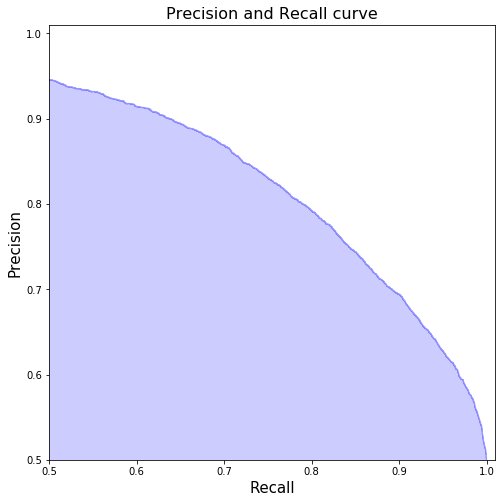

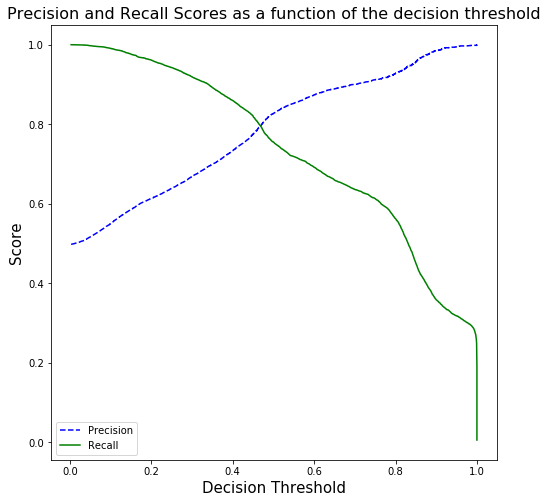

In [9]:
def precision_recall_threshold(p, r, thresholds, t=0.5):      
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve", fontsize = 16)
    plt.step(r, p, color='b', alpha=0.2, where='post')
    plt.fill_between(r, p, step='post', alpha=0.2, color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall', fontsize = 15);
    plt.ylabel('Precision', fontsize = 15);
    
    plt.savefig('../Figures/MLP/mlp_pr.png')   
    
    
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold", fontsize = 16)
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score", fontsize = 15)
    plt.xlabel("Decision Threshold", fontsize = 15)
    plt.legend(loc='best')
    
    plt.savefig('../Figures/MLP/mlp_prt.png')   
    

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
precision_recall_threshold(precisions, recalls, thresholds, t=0.44)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [10]:
# Defining the treshold

threshold = 0.467
y_pred = [round(i - threshold + 0.5) for i in y_scores]

# Apresentando Resultados

### Plotting Confusion Matrix 

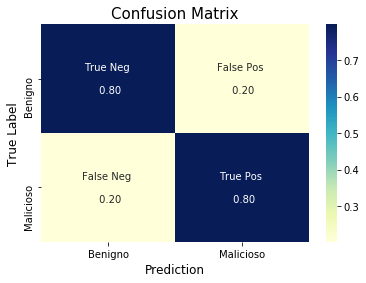

In [11]:
# Plotting Confusion Matrix
def plot_confusion_matrix(cm):
    cm_norm = np.asarray([cm[0]/sum(cm[0]),
                          cm[1]/sum(cm[1])])
    
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_percentages = ["{0:.2f}".format(value) for value in cm_norm.flatten()]
    labels = [f"{v1} \n\n {v2}" for v1, v2, in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)       
    

    x_axis_labels = ['Benigno', 'Malicioso'] # labels for x-axis
    y_axis_labels = ['Benigno', 'Malicioso'] # labels for y-axis
   
    sns.heatmap(cm,
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels,
                annot=labels,
                fmt='',
                cmap='YlGnBu')
    
    plt.title('Confusion Matrix', fontsize = 15)
    plt.xlabel('Prediction', fontsize = 12)
    plt.ylabel('True Label', fontsize = 12)
    
    plt.savefig('../Figures/MLP/mlp_confusion_matrix.png')   
    
cm = confusion_matrix(y_test, y_pred, normalize='true')    
plot_confusion_matrix(cm)

### Plotting Precision, Recall and F1-Score

In [12]:
print('Accuracy:  ', accuracy_score(y_test, y_pred))
print('Precision: ', recall_score(y_test, y_pred))
print('Recall:    ', precision_score(y_test, y_pred))
print('F1-score:  ', f1_score(y_test, y_pred))

Accuracy:   0.7965813129937347
Precision:  0.7975929978118161
Recall:     0.7946586728437117
F1-score:   0.7961231315268582


### Plotting Cross Validations Scores

In [13]:
# Calculating Cross Validation
results = cross_validate(clf, X_train.values, y_train.values, cv=5)

Iteration 1, loss = 0.50097953
Validation score: 0.741647
Iteration 2, loss = 0.47302373
Validation score: 0.759523
Iteration 3, loss = 0.46565423
Validation score: 0.761864
Iteration 4, loss = 0.46031436
Validation score: 0.768887
Iteration 5, loss = 0.45569066
Validation score: 0.766120
Iteration 6, loss = 0.45277544
Validation score: 0.764844
Iteration 7, loss = 0.45063258
Validation score: 0.770589
Iteration 8, loss = 0.44874438
Validation score: 0.773994
Iteration 9, loss = 0.44545251
Validation score: 0.774846
Iteration 10, loss = 0.44406100
Validation score: 0.776974
Iteration 11, loss = 0.44189581
Validation score: 0.774207
Iteration 12, loss = 0.43923292
Validation score: 0.780379
Iteration 13, loss = 0.43870406
Validation score: 0.781656
Iteration 14, loss = 0.43708700
Validation score: 0.778676
Iteration 15, loss = 0.43567712
Validation score: 0.782081
Iteration 16, loss = 0.43424899
Validation score: 0.782720
Iteration 17, loss = 0.43344391
Validation score: 0.782507
Iterat

Iteration 2, loss = 0.46995407
Validation score: 0.770377
Iteration 3, loss = 0.46364754
Validation score: 0.777187
Iteration 4, loss = 0.45830167
Validation score: 0.782294
Iteration 5, loss = 0.45451871
Validation score: 0.778889
Iteration 6, loss = 0.45029029
Validation score: 0.781017
Iteration 7, loss = 0.44804777
Validation score: 0.783997
Iteration 8, loss = 0.44497429
Validation score: 0.786763
Iteration 9, loss = 0.44317605
Validation score: 0.788678
Iteration 10, loss = 0.44108183
Validation score: 0.787402
Iteration 11, loss = 0.43840989
Validation score: 0.788678
Iteration 12, loss = 0.43720090
Validation score: 0.787827
Iteration 13, loss = 0.43546616
Validation score: 0.789955
Iteration 14, loss = 0.43409782
Validation score: 0.789530
Iteration 15, loss = 0.43302095
Validation score: 0.787614
Iteration 16, loss = 0.43195573
Validation score: 0.792935
Iteration 17, loss = 0.43089538
Validation score: 0.791445
Iteration 18, loss = 0.43032367
Validation score: 0.789955
Itera

In [14]:
# Imprimindo os resultados

## Resultado de cada k-fold
for i, score in enumerate(results["test_score"]):
    print(f"Acurácia K-fold no. {i} : {score}")

## Média dos k-folds
print()
print('Média dos K-folds:', np.mean(results["test_score"]))

Acurácia K-fold no. 0 : 0.7924576487613859
Acurácia K-fold no. 1 : 0.7883714991061548
Acurácia K-fold no. 2 : 0.7930535455861071
Acurácia K-fold no. 3 : 0.7863284242785392
Acurácia K-fold no. 4 : 0.7940575515068959

Média dos K-folds: 0.7908537338478165


### Plotting Roc Curve

Area Under Cruve (AUC): 0.882174227160312


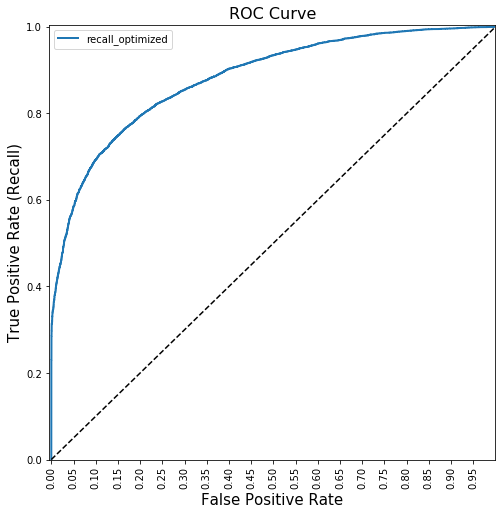

In [15]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve', fontsize = 16)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate", fontsize = 15)
    plt.ylabel("True Positive Rate (Recall)", fontsize = 15)
    plt.legend(loc='best')
    
    plt.savefig('../Figures/MLP/mlp_roc_curve.png')   
    
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
plot_roc_curve(fpr, tpr, 'recall_optimized')

# Roc Curve
print('Area Under Cruve (AUC):', auc(fpr, tpr)) # AUC of ROC   

# Post Analysis

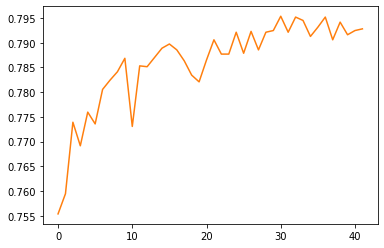

In [16]:
train_loss = clf.loss_curve_
valid_acc = clf.validation_scores_

# plt.plot(train_loss, color='tab:blue')
plt.plot(valid_acc, color='tab:orange')
plt.savefig('../Figures/MLP/vald_acc.png')
plt.show()

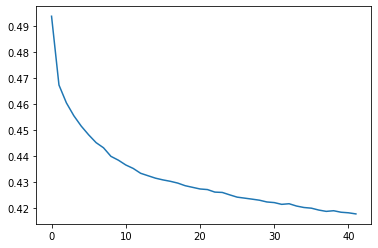

In [17]:
train_loss = clf.loss_curve_
valid_acc = clf.validation_scores_

plt.plot(train_loss, color='tab:blue')
# plt.plot(valid_acc, color='tab:orange')
plt.savefig('../Figures/MLP/train_loss.png')
plt.show()